# Heart failure model

pip install pandas numpy matplotlib seaborn scikit-learn

In [1]:
#!pip install numpy pandas matplotlib seaborn scikit-learn

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve

In [4]:
#Load the dataset
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
print('Data:\n', data)
print('\n\nData head:\n', data.head())
print('\n\nData tail:\n', data.tail())
print('\n\nData info:\n', data.info())
print('\n\nSummary:\n', data.describe())

Data:
       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium 

In [5]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


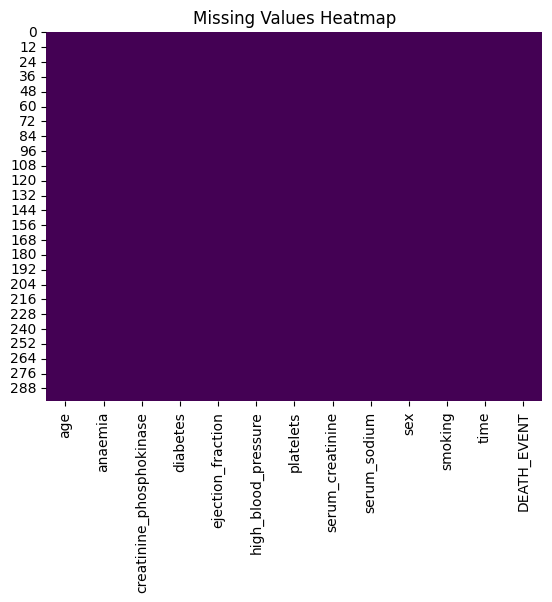

In [6]:
# Visualize missing values as a heatmap
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

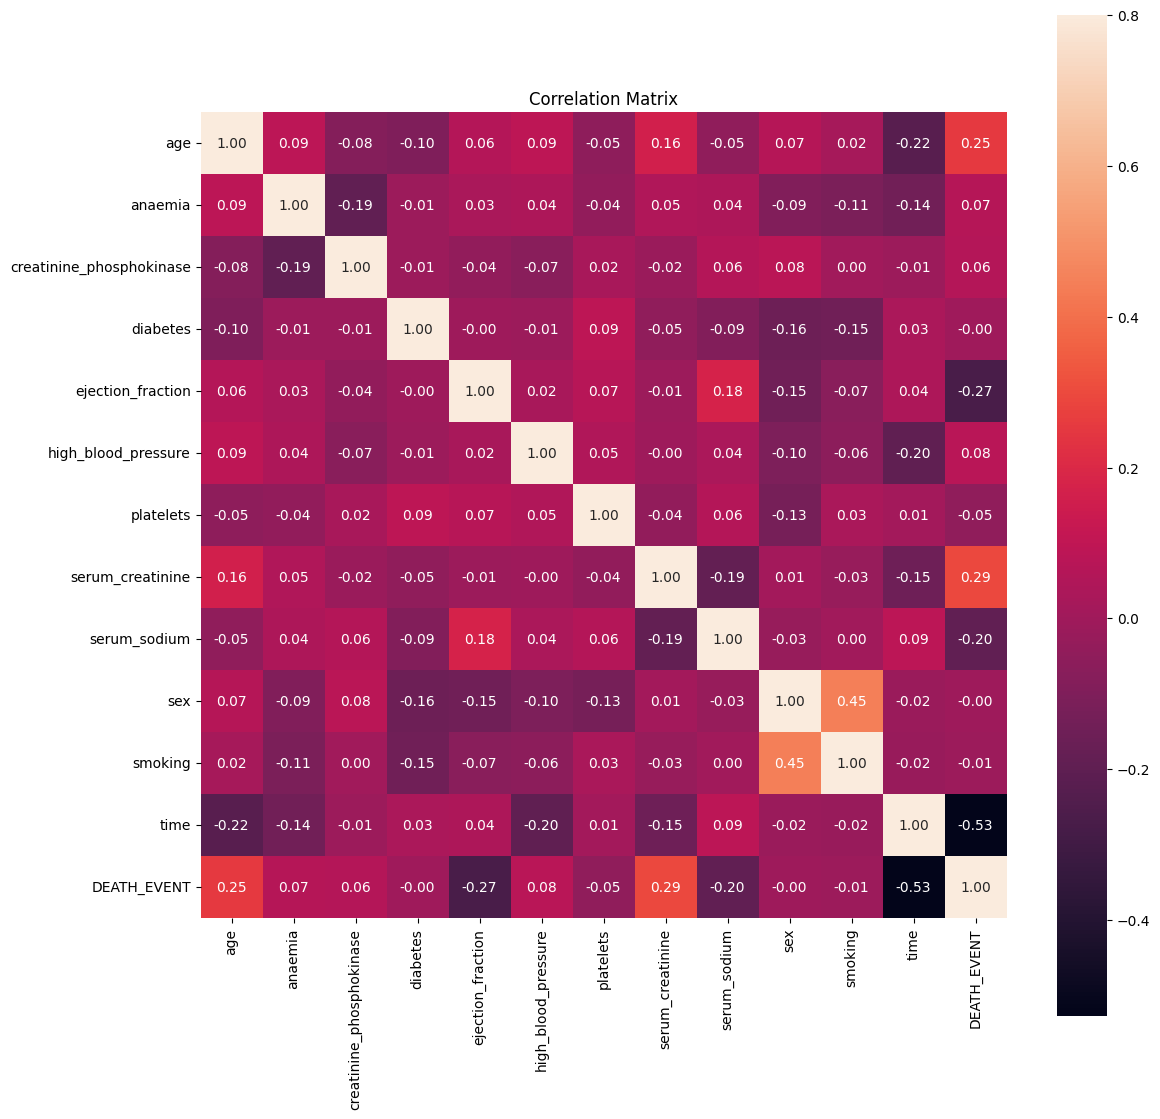

In [7]:
# Plotting the Correlation Matrix
corrmat = data.corr()
fig = plt.figure(figsize = (13, 13))
sns.heatmap(corrmat, vmax = .8, square = True, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

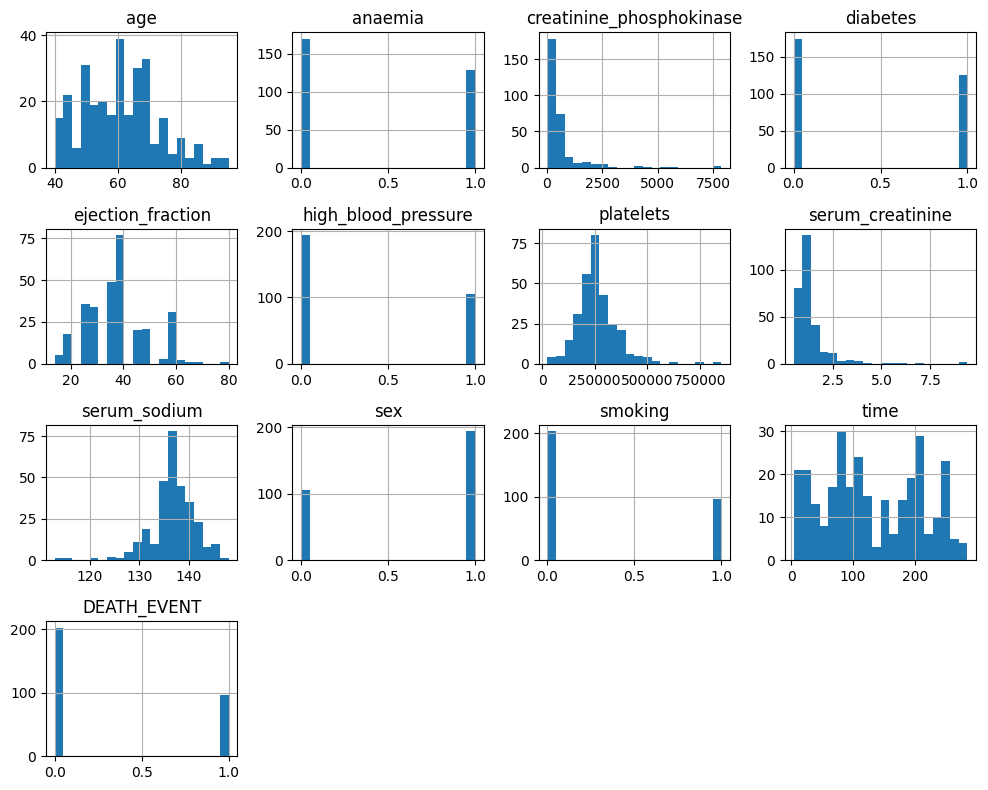

In [8]:
# Plot histograms for numerical features
data.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

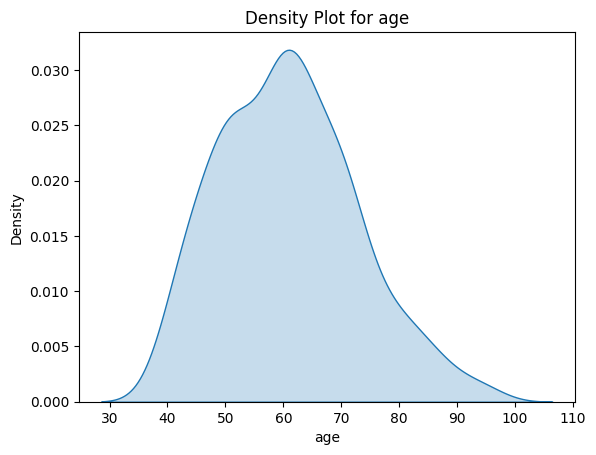

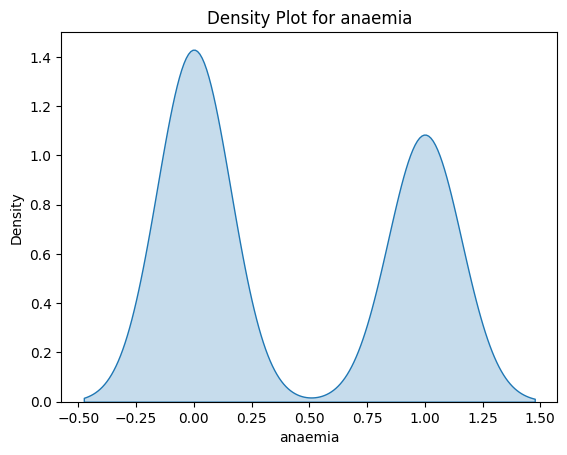

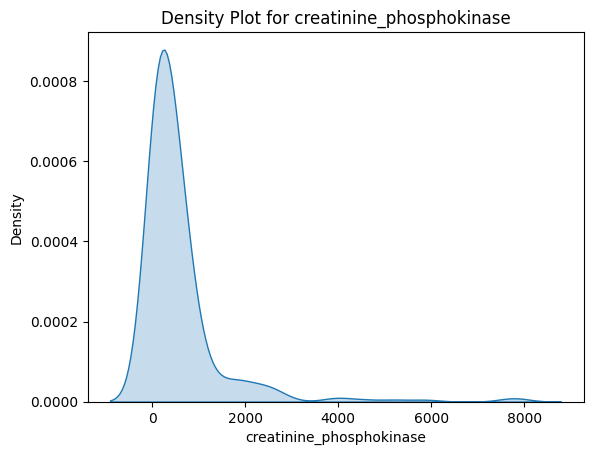

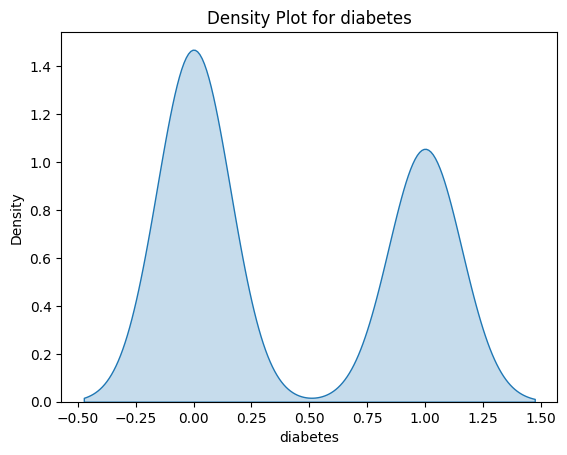

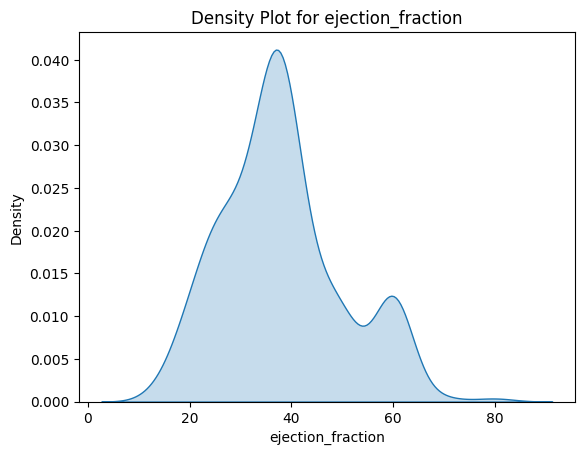

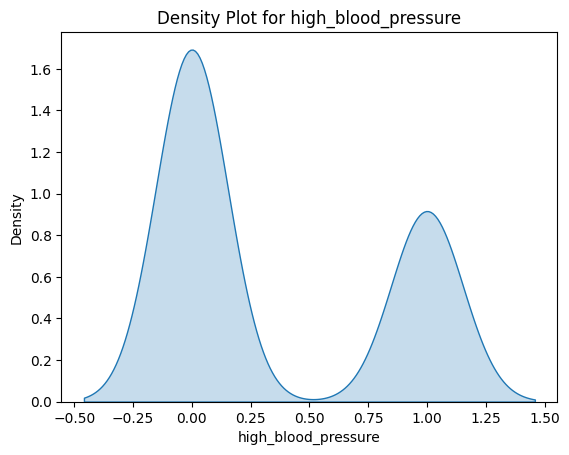

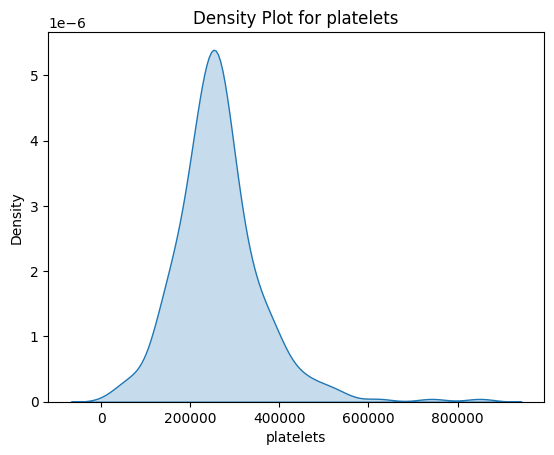

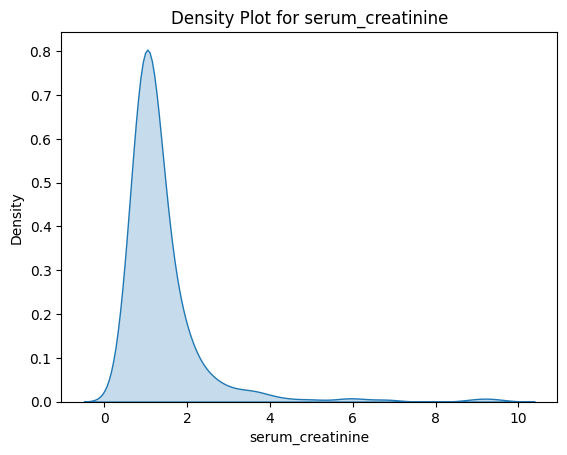

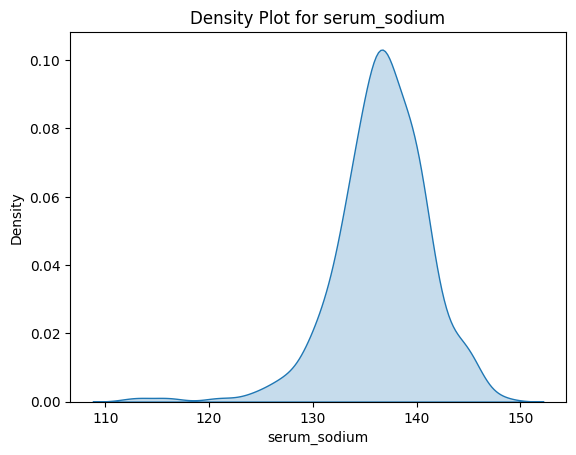

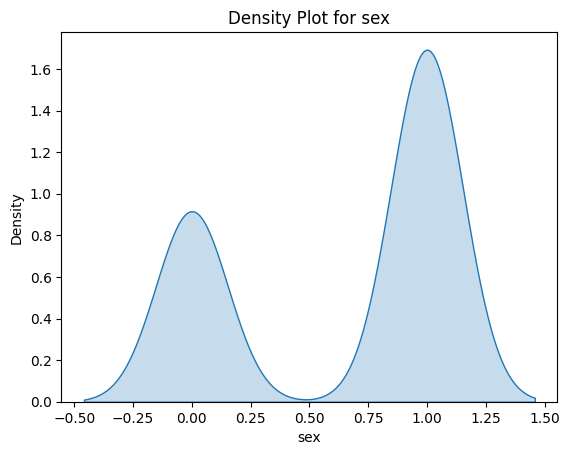

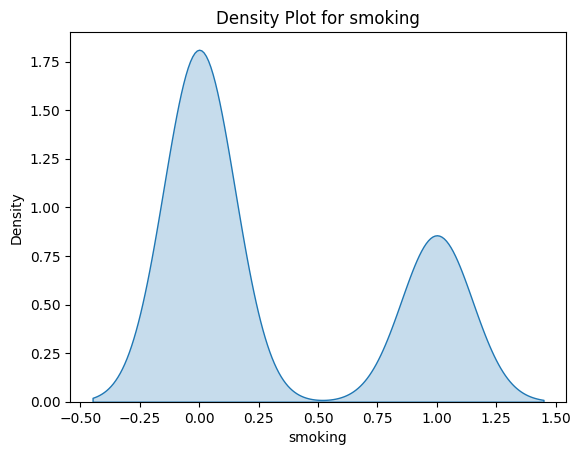

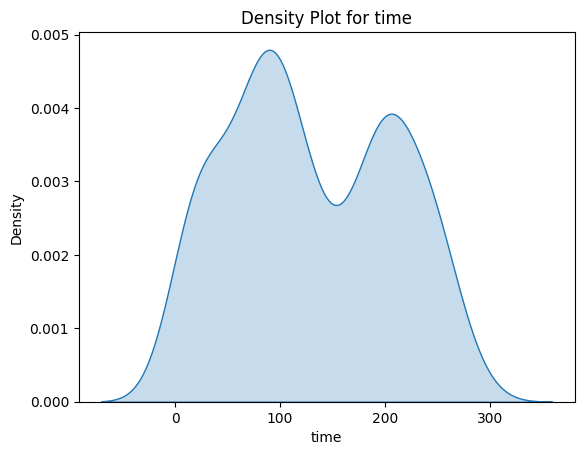

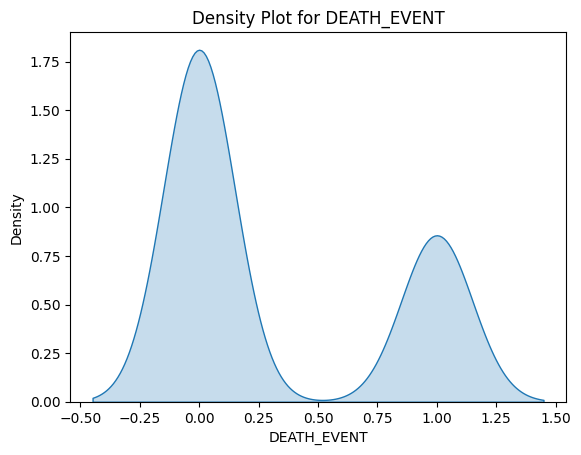

In [9]:
#Density Plots: Highlight the overall distribution shape
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    sns.kdeplot(data[col], shade=True)
    plt.title(f"Density Plot for {col}")
    plt.show()

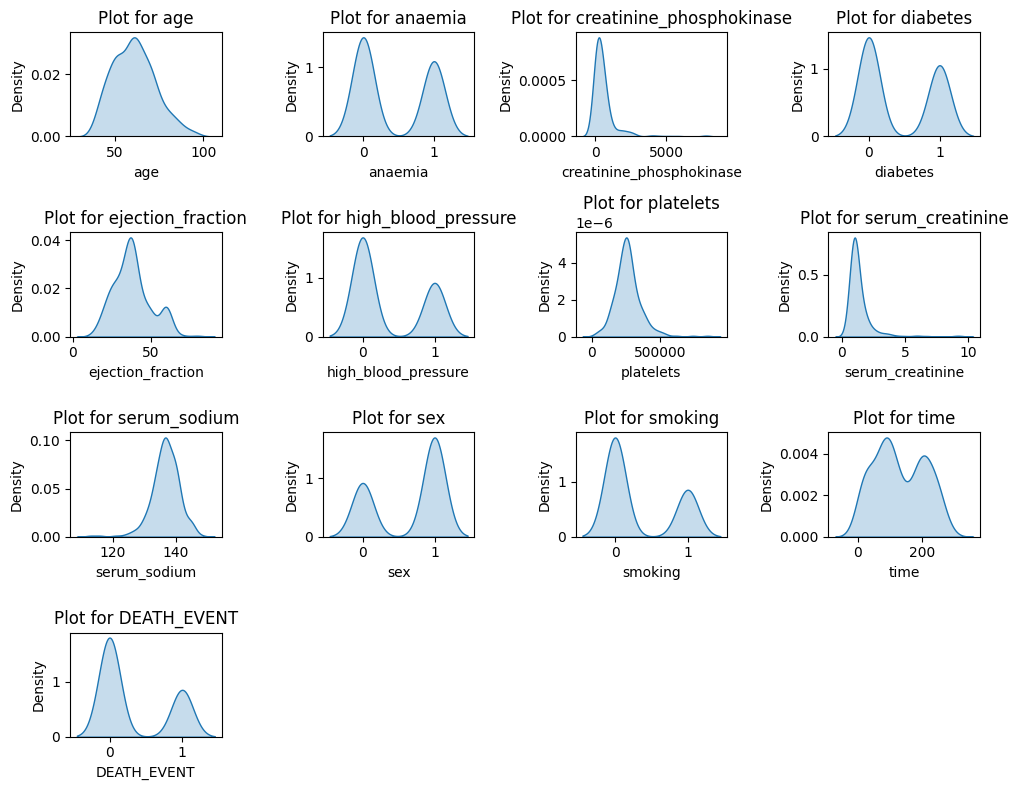

In [10]:
# Get all numerical columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Set rows and columns dynamically
n_cols = 4
n_rows = -(-len(num_cols) // n_cols)  # Calculate rows dynamically

# Set up the plot grid
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 2 * n_rows))

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through columns and plot
for i, col in enumerate(num_cols):
    sns.kdeplot(data[col], shade=True, ax=axes[i])
    axes[i].set_title(f"Plot for {col}")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


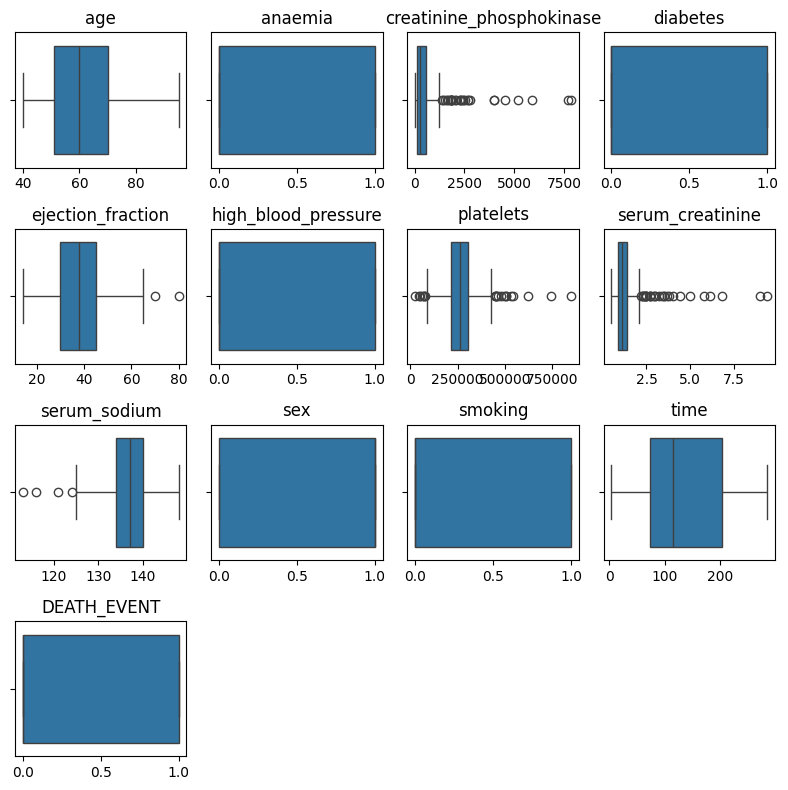

In [11]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
# Filter numerical columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
# Determine the number of rows and columns for the grid
n_cols = 4  # Number of plots per row
n_rows = math.ceil(len(numeric_columns) / n_cols)  # Calculate rows needed based on the number of columns

# Create the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, n_rows * 2))  # Adjust height for better readability
axes = axes.flatten()  # Flatten to make indexing easier

# Plot each numerical column in the appropriate subplot
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel("")  # Optional: Remove xlabel if you want cleaner plots
    
# Hide unused subplots (if any)
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])  # Remove any unused axes

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

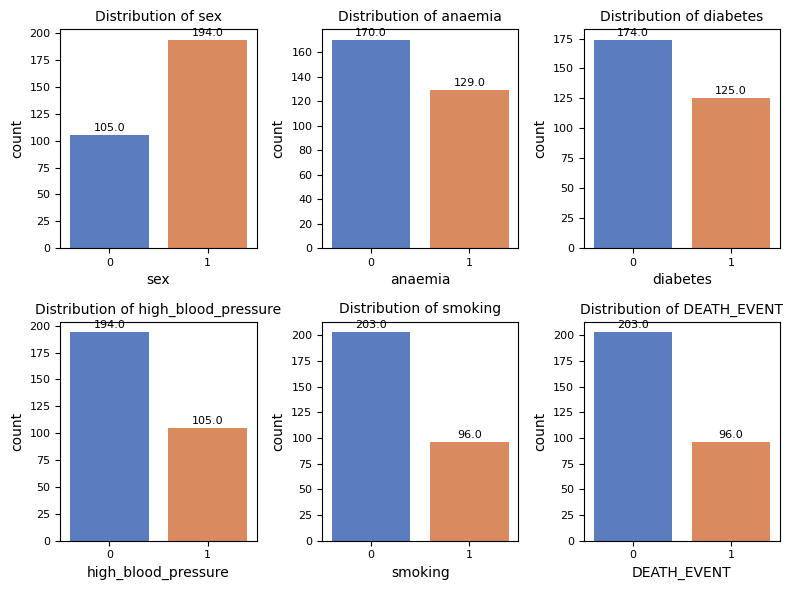

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
categorical_columns = ['sex', 'anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'DEATH_EVENT']

# Define the grid size
n_cols = 3
n_rows = -(-len(categorical_columns) // n_cols)  # Calculate rows dynamically

# Set up the plot grid
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(8, 6))  # Adjust figure size
axes = axes.flatten()  # Flatten axes for easier iteration

# Plot bar plots for each categorical column
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=data, palette="muted", ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=10)
    axes[i].tick_params(axis='both', labelsize=8)
    
    # Add data labels
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', fontsize=8, color='black', 
                         xytext=(0, 5), textcoords='offset points')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to fit plots
plt.show()


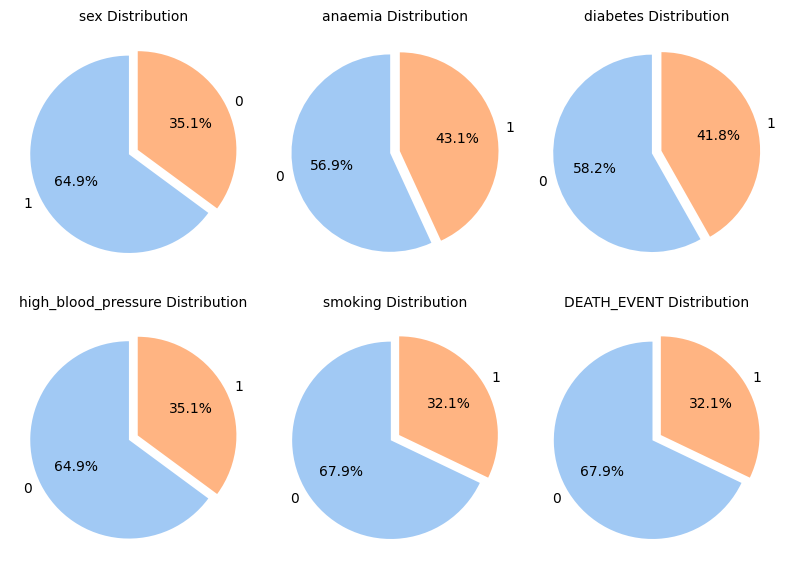

In [13]:
import matplotlib.pyplot as plt

# List of categorical columns
categorical_columns = ['sex', 'anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'DEATH_EVENT']

# Define grid size
n_cols = 3
n_rows = -(-len(categorical_columns) // n_cols)  # Calculate rows dynamically

# Set up the plot grid
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(8, 6))  # Adjust figure size
axes = axes.flatten()  # Flatten axes for easier iteration

# Plot pie charts for each categorical column
for i, col in enumerate(categorical_columns):
    data[col].value_counts().plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        ax=axes[i],
        shadow=False, 
        explode=[0.05] * data[col].nunique(),
        colors=sns.color_palette('pastel')
    )
    axes[i].set_title(f'{col} Distribution', fontsize=10)
    axes[i].set_ylabel("")  # Remove ylabel for cleaner output

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Separate features and target

In [14]:
# Define features (X) and labels (y)
X = data.drop('DEATH_EVENT',axis=1) # Drop the target column to retain only features
y = data['DEATH_EVENT']  # Target variable (label)

In [15]:
print("Features shape (X):", X.shape)
print("Target shape (y):", y.shape)

Features shape (X): (299, 12)
Target shape (y): (299,)


# Comparioson

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
X = data.drop('DEATH_EVENT',axis=1)
y = data['DEATH_EVENT']

In [18]:
# Initialize list to store models
models = []

# Add different classifiers to the list with shorthand names
models.append(('LR', LogisticRegression(max_iter=100)))  # Logistic Regression
models.append(('KNN', KNeighborsClassifier()))           # K-Nearest Neighbors
models.append(('DT', DecisionTreeClassifier()))          # Decision Tree
models.append(('GNB', GaussianNB()))                     # Gaussian Naive Bayes
models.append(('RFC', RandomForestClassifier()))         # Random Forest
models.append(('SVC', SVC()))                            # Support Vector Classifier
models.append(('LDA', LinearDiscriminantAnalysis()))     # Linear Discriminant Analysis

# Initialize empty lists to store results, names, and average scores
results = []
resultsf = []
names = []
avgs = []
avgsf = []

In [19]:
# Initialize StratifiedKFold Cross-Validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # 10 folds, shuffled, and reproducible with random_state

# Loop through the models to evaluate each one
for name, model in models:
    # Perform cross-validation
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='f1')
    
    # Append results
    results.append(cv_results)      # Append all accuracy scores for the model
    resultsf.append(cv_scores)      # Append all f1 scores for the model
    names.append(name)              # Append the model name
    avgs.append(cv_results.mean())  # Append the mean accuracy score
    avgsf.append(cv_scores.mean())  # Append the mean f1 score
    
    # Print results for the current model
    print(name, 'accuracy', cv_results.round(2))
    print(name, 'f1 score', cv_scores.round(2))
    print(f"{name}: Mean Accuracy = {cv_results.mean():.2f}, Mean F1-Score = {cv_scores.mean():.2f}\n")

LR accuracy [0.8  0.8  0.77 0.83 0.9  0.73 0.9  0.8  0.87 0.79]
LR f1 score [0.67 0.73 0.59 0.78 0.84 0.56 0.8  0.62 0.75 0.57]
LR: Mean Accuracy = 0.82, Mean F1-Score = 0.69

KNN accuracy [0.7  0.53 0.63 0.67 0.53 0.53 0.7  0.73 0.6  0.59]
KNN f1 score [0.31 0.12 0.15 0.38 0.12 0.3  0.4  0.33 0.   0.14]
KNN: Mean Accuracy = 0.62, Mean F1-Score = 0.23

DT accuracy [0.8  0.87 0.83 0.87 0.73 0.67 0.83 0.67 0.73 0.79]
DT f1 score [0.7  0.8  0.63 0.87 0.67 0.62 0.74 0.5  0.59 0.62]
DT: Mean Accuracy = 0.78, Mean F1-Score = 0.67

GNB accuracy [0.8  0.77 0.73 0.77 0.77 0.77 0.87 0.8  0.8  0.79]
GNB f1 score [0.62 0.59 0.5  0.63 0.59 0.59 0.71 0.62 0.62 0.57]
GNB: Mean Accuracy = 0.79, Mean F1-Score = 0.61

RFC accuracy [0.8  0.93 0.8  0.9  0.93 0.8  0.9  0.8  0.73 0.86]
RFC f1 score [0.74 0.95 0.67 0.87 0.9  0.62 0.67 0.67 0.56 0.67]
RFC: Mean Accuracy = 0.85, Mean F1-Score = 0.73

SVC accuracy [0.67 0.67 0.67 0.67 0.67 0.67 0.7  0.7  0.7  0.69]
SVC f1 score [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
S

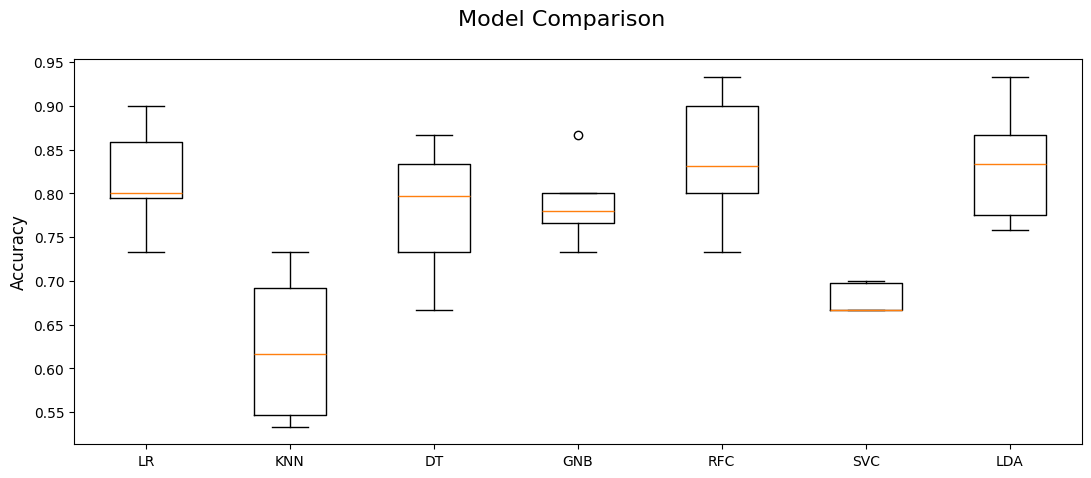

In [20]:
fig = plt.figure(figsize=(13, 5))  # Create a figure with a specific size
fig.suptitle("Model Comparison", fontsize=16)  # Add a title to the figure

ax = fig.add_subplot(111)         # Add a single subplot to the figure (1 row, 1 column, 1st plot)
plt.boxplot(results)              # Create a boxplot using the cross-validation results

ax.set_xticklabels(names)         # Set the x-axis labels to model names
ax.set_ylabel("Accuracy", fontsize=12)
plt.show()                        # Display the plot

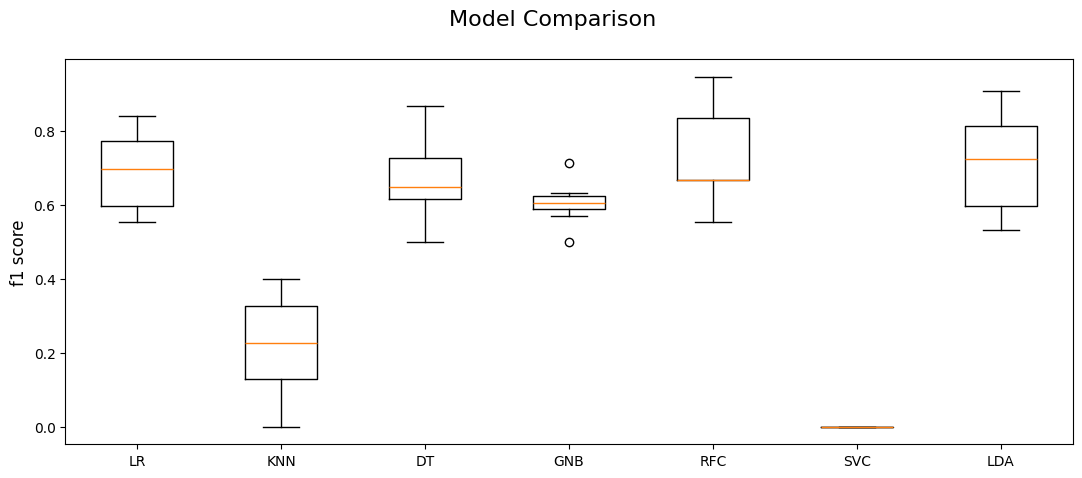

In [21]:
fig = plt.figure(figsize=(13, 5))  # Create a figure with a specific size
fig.suptitle("Model Comparison", fontsize=16)  # Add a title to the figure

ax = fig.add_subplot(111)         # Add a single subplot to the figure (1 row, 1 column, 1st plot)
plt.boxplot(resultsf)              # Create a boxplot using the cross-validation results

ax.set_xticklabels(names)         # Set the x-axis labels to model names
ax.set_ylabel("f1 score", fontsize=12)
plt.show()          

In [22]:
# Create a DataFrame to summarize model names and their average accuracies and f1-score
df=pd.DataFrame([names,avgs,avgsf],index=['Name','Average Accuracy','Average f1score'],columns=np.arange(1,8)).T
# Display the DataFrame
print(df)

  Name Average Accuracy Average f1score
1   LR          0.81931        0.690887
2  KNN         0.621954        0.226273
3   DT          0.77931        0.673327
4  GNB         0.785977          0.6057
5  RFC         0.846207          0.7301
6  SVC         0.678966             0.0
7  LDA         0.835862        0.718708


In [23]:
# Find the model with the highest average accuracy
print(df[df['Average Accuracy'] == df["Average Accuracy"].max()])

  Name Average Accuracy Average f1score
5  RFC         0.846207          0.7301


In [24]:
# Find the model with the highest f1-score
print(df[df['Average f1score'] == df["Average f1score"].max()])

  Name Average Accuracy Average f1score
5  RFC         0.846207          0.7301


# Random Forest Classifier

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve

In [26]:
# Load the dataset
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [27]:
# Separate features and target
X = data.drop("DEATH_EVENT", axis=1)
y = data["DEATH_EVENT"]

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [29]:
# Model selection and training
# Build a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Make predictions
# Predict on the testing set
y_pred = model.predict(X_test)
# Predict probabilities for ROC curve
y_proba = model.predict_proba(X_test)[:, 1]

In [31]:
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)
precision = precision_score(y_test, y_pred)
print('Precision: ', precision)
recall = recall_score(y_test, y_pred)
print('Recall: ', recall)
f1score = f1_score(y_test, y_pred)
print('F1 score: ',f1score)
roc_auc = roc_auc_score(y_test, y_proba)
print('ROC-AUC Score: ',roc_auc)
class_report = classification_report(y_test, y_pred)
print('Classification Report: \n', class_report)
confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', confusionmatrix)

Accuracy:  0.8333333333333334
Precision:  0.8
Recall:  0.631578947368421
F1 score:  0.7058823529411765
ROC-AUC Score:  0.8915275994865212
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.93      0.88        41
           1       0.80      0.63      0.71        19

    accuracy                           0.83        60
   macro avg       0.82      0.78      0.79        60
weighted avg       0.83      0.83      0.83        60

Confusion Matrix: 
 [[38  3]
 [ 7 12]]


Text(0.5, 25.722222222222214, 'Predicted class')

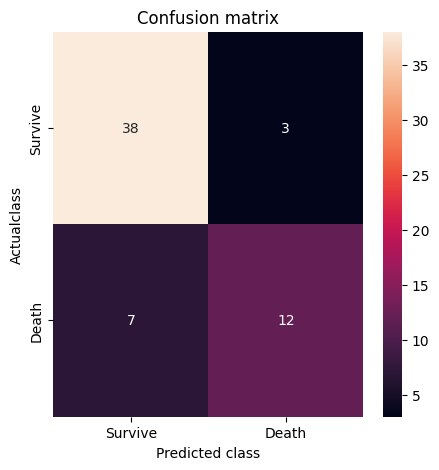

In [32]:
#visualizing confusion matrix
# printing the confusion matrix
LABELS = ['Survive', 'Death']
plt.figure(figsize =(5, 5))
sns.heatmap(confusionmatrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('Actualclass')
plt.xlabel('Predicted class')

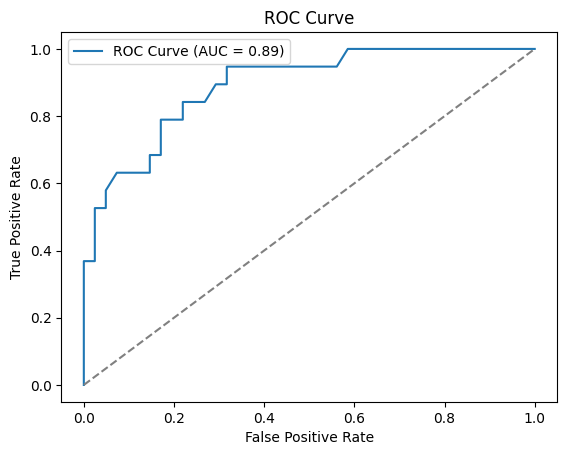

In [33]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

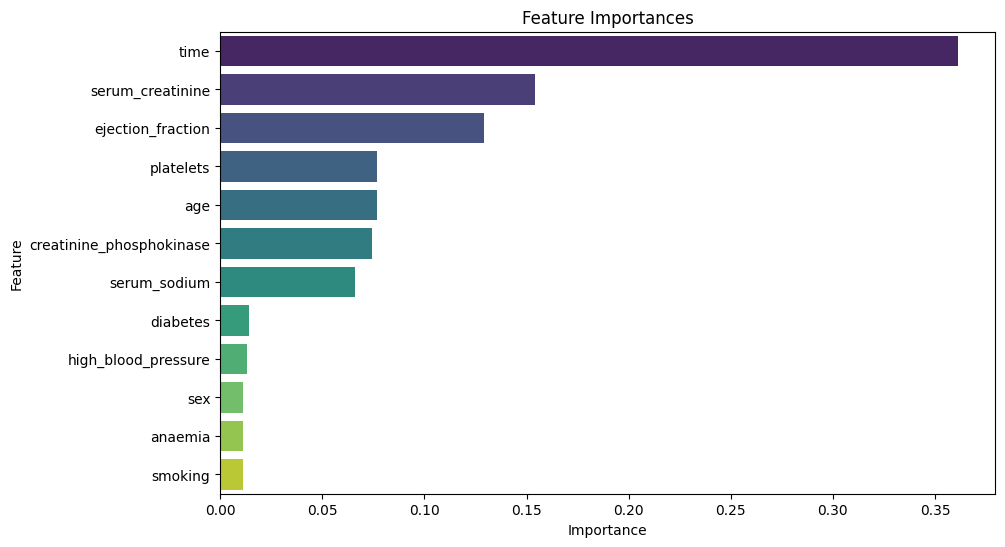

In [34]:
# Feature importance
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis", hue="Feature", dodge=False)
plt.title("Feature Importances")
plt.show()

# Predicting for some values

In [35]:
test1 =  pd.DataFrame([[75, 0, 582, 0, 20, 1, 265000, 1.9, 130, 1, 0, 4]], columns=X.columns)
print(model.predict(test1))
test2 = pd.DataFrame([[53,0,63,1,60,0,368000,0.8,135,1,0,22]], columns=X.columns)
print(model.predict(test2))

[1]
[0]
